In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", reshape=False)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz

Image Shape: (28, 28, 1)

Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


In [3]:
import numpy as np

# Pad images with 0s
X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
print("Updated Image Shape: {}".format(X_train[0].shape))


Updated Image Shape: (32, 32, 1)


6


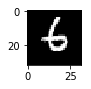

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

In [5]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [11]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128
patch_size = 5
num_color = 1 
depth = 6

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(patch_size, patch_size, num_color, depth), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(depth))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    #
    print ("fc0", conv2.get_shape())
    print ("as list:", conv2.get_shape().as_list())
    fc0.reshape()
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 10), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(10))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [12]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 10)

In [8]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

fc0 (?, 5, 5, 16)


In [9]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.966

EPOCH 2 ...
Validation Accuracy = 0.977

EPOCH 3 ...
Validation Accuracy = 0.984

EPOCH 4 ...
Validation Accuracy = 0.987

EPOCH 5 ...
Validation Accuracy = 0.987

EPOCH 6 ...
Validation Accuracy = 0.987

EPOCH 7 ...
Validation Accuracy = 0.989

EPOCH 8 ...
Validation Accuracy = 0.988

EPOCH 9 ...
Validation Accuracy = 0.987

EPOCH 10 ...
Validation Accuracy = 0.989

Model saved


In [11]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.989


In [47]:
#use dstack to create 3d array not vstack or hstack

import tensorflow as tf
import numpy as np

a = np.array([[1.,0.,1.,2.,2.],[1,0,2,0,0],[0,0,0,1,1],[2,0,0,2,2],[0,1,1,0,2]])
b = np.array([[2.,2.,0.,2.,1.],[1,2,2,2,2],[0,1,1,2,1],[2,0,1,0,0],[1,1,0,0,0]])
c = np.array([[1.,2.,2.,1.,2.],[0,2,0,1,1],[2,2,2,0,1],[0,1,1,2,1],[1,0,2,2,2]])

z = np.dstack((a,b,c))

print(z.shape)

print("0:",z[:,:,0])
print("1:",z[:,:,1])
print("2:",z[:,:,2])

#print("z:",z)

(5, 5, 3)
0: [[ 1.  0.  1.  2.  2.]
 [ 1.  0.  2.  0.  0.]
 [ 0.  0.  0.  1.  1.]
 [ 2.  0.  0.  2.  2.]
 [ 0.  1.  1.  0.  2.]]
1: [[ 2.  2.  0.  2.  1.]
 [ 1.  2.  2.  2.  2.]
 [ 0.  1.  1.  2.  1.]
 [ 2.  0.  1.  0.  0.]
 [ 1.  1.  0.  0.  0.]]
2: [[ 1.  2.  2.  1.  2.]
 [ 0.  2.  0.  1.  1.]
 [ 2.  2.  2.  0.  1.]
 [ 0.  1.  1.  2.  1.]
 [ 1.  0.  2.  2.  2.]]


w0_a=np.array([[-1,0,1],[-1,-1,1],[-1,-1,0]],dtype=float32)
w0_b=np.array([[-1,1,-1],[0,0,1],[1,1,0]],dtype=float32)
w0_c=np.array([[-1,1,-1],[-1,0,1],[1,0,1]],dtype=float32)

w0 = np.dstack((w0_a,w0_b,w0_c))

w1_a=([[-1,-1,-1],[-1,-1,0],[-1,0,-1]])
w1_b=([[-1,-1,-1],[0,0,-1],[1,-1,-1]])
w1_c=([[-1,-1,-1],[-1,-1,0],[1,-1,0]])

w1 = np.dstack((w1_a,w1_b,w1_c))

img = tf.pack(z)
#how to combine w0,w1 into tensor weight?
weight0 = tf.pack(w0)
weight1 = tf.pack(w1)
#bias is 0 depending on patch size


In [45]:
patch_size=7 
num_color=3
depth = 2
mu=0.0
sigma=.1

conv1_W = tf.Variable(tf.truncated_normal(shape=(patch_size, patch_size, num_color, depth), mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.zeros(depth))
conv1_W.get_shape()
conv1_b.get_shape()
print("z:",z)
print ("conv1_W:",conv1_W)
#conv1   = tf.nn.conv2d(z, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
#sess = tf.Session()
#sess.run(conv1_b)

z: [[[ 1.  2.  1.]
  [ 0.  2.  2.]
  [ 1.  0.  2.]
  [ 2.  2.  1.]
  [ 2.  1.  2.]]

 [[ 1.  1.  0.]
  [ 0.  2.  2.]
  [ 2.  2.  0.]
  [ 0.  2.  1.]
  [ 0.  2.  1.]]

 [[ 0.  0.  2.]
  [ 0.  1.  2.]
  [ 0.  1.  2.]
  [ 1.  2.  0.]
  [ 1.  1.  1.]]

 [[ 2.  2.  0.]
  [ 0.  0.  1.]
  [ 0.  1.  1.]
  [ 2.  0.  2.]
  [ 2.  0.  1.]]

 [[ 0.  1.  1.]
  [ 1.  1.  0.]
  [ 1.  0.  2.]
  [ 0.  0.  2.]
  [ 2.  0.  2.]]]
conv1_W: Tensor("Variable_28/read:0", shape=(7, 7, 3, 2), dtype=float32)
